In [6]:
#se importan las librerias
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


um=1e-6
mm=1e-3
nm=1e-9
cm=1e-2
dx=dy=1*um
wavelength=650*nm
k=2*np.pi/wavelength


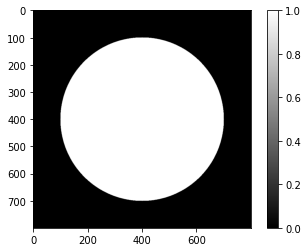

In [10]:
#Apertura circular
mask=np.zeros((800,800),dtype="uint8")
#cv2.line(mask,(600,700),(77,70),1,2)
#cv2.line(mask,(600,700),(600,400),0,2)
cv2.circle(mask,(400,400),300,1,-1)
plt.imshow(mask,cmap="gray")
plt.colorbar()
plt.show()
np.size(mask)

U_0=mask

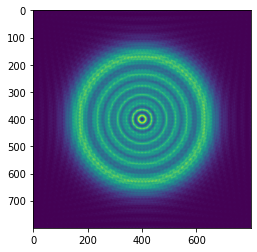

In [7]:
#espectro inicial
z=1*cm
A_0=np.fft.fftshift(np.fft.fft2(U_0))
N,M= np.shape(U_0)
x=np.arange(-int(N/2),int(N/2),1)
y=np.arange(-int(M/2),int(M/2),1)
X, Y=np.meshgrid(x,y)

#dimensiones de mundo en frecuencias
fx=X*(1/(N*dx))
fy=Y*(1/(M*dy))

#transferencia
H=np.exp(1j*k*z* np.emath.sqrt( 1 - (wavelength**2)*(fx**2+fy**2)  ))
A_z=A_0*H
U_z=np.fft.ifft2(A_z)
plt.imshow(np.abs(U_z)**2)

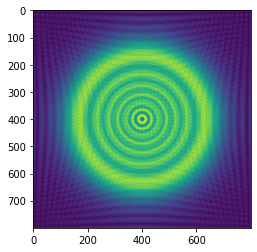

In [9]:
# ESPECTRO ANGULAR POR FFT
def AngFT(entrada,z,dx,dy,wavelength):
    k=2*np.pi/wavelength
    A_0=np.fft.fftshift(np.fft.fft2(entrada))
    N,M= np.shape(entrada)
    x=np.arange(-int(N/2),int(N/2),1)
    y=np.arange(-int(M/2),int(M/2),1)
    X, Y=np.meshgrid(x,y)

    #dimensiones de mundo en frecuencias
    fx=X*(1/(N*dx))
    fy=Y*(1/(M*dy))

    #transferencia
    H=np.exp(1j*k*z* np.emath.sqrt( 1 - (wavelength**2)*(fx**2+fy**2)  ))
    A_z=A_0*H
    U_z=np.fft.ifft2(A_z)
        
    return U_z

plt.imshow(np.abs(AngFT(mask,1*cm,1*um,1*um,650*nm)))
plt.show()